In [1]:
import keras
from keras.datasets import cifar10

In [97]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data() # x가 rgb를 포함한 data, y가 label data

In [98]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [99]:
import matplotlib.pyplot as plt
import numpy as np

In [100]:
from keras.utils import to_categorical

In [101]:
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

In [102]:
print(x_train.shape) # 이미지수 , 이미지 크기, rgb
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)
print(x_test.shape)
print(y_test.shape)

(45000, 32, 32, 3)
(45000, 1)
(5000, 32, 32, 3)
(5000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [103]:
# 데이터 정규화
mean = np.mean(x_train, axis=(0,1,2,3))
std = np.std(x_train, axis=(0,1,2,3))

In [104]:
print(mean,std)

120.735214 64.12227


In [105]:
x_train = (x_train - mean) / (std + 1e-7)
x_valid =(x_valid - mean) / (std + 1e-7)
x_test = (x_test - mean) / (std + 1e-7)

In [106]:
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes) #to_categorical ==> one-hot encoding
y_valid = to_categorical(y_valid, num_classes)
y_test = to_categorical(y_test, num_classes)

In [107]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Conv3D
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from keras import regularizers

In [108]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.attention.multi_head_attention import regularization

In [109]:
x_train

array([[[[-0.9471782 , -0.60408366, -1.0407494 ],
         [-1.2590823 , -0.82241654, -1.3214631 ],
         [-1.0719398 , -0.61967885, -1.0719398 ],
         ...,
         [-1.0563446 , -1.2122967 , -1.1031302 ],
         [-0.85360694, -1.0251542 , -0.931583  ],
         [-0.7444405 , -0.9159878 , -0.82241654]],

        [[-0.13622747, -0.10503706, -0.10503706],
         [-0.9783686 , -0.7756309 , -1.009559  ],
         [-0.9783686 , -0.61967885, -1.0563446 ],
         ...,
         [-1.0407494 , -1.1499158 , -1.0563446 ],
         [-0.83801174, -0.9783686 , -0.86920214],
         [-0.7600357 , -0.9159878 , -0.80682135]],

        [[ 0.7682945 ,  0.6279376 ,  0.89305615],
         [-0.02706102, -0.04265623, -0.01146582],
         [-0.63527405, -0.4949172 , -0.7288453 ],
         ...,
         [-1.009559  , -1.1031302 , -1.009559  ],
         [-0.79122615, -0.9003926 , -0.79122615],
         [-0.7600357 , -0.88479733, -0.7756309 ]],

        ...,

        [[-0.4637268 , -0.12063226, -0

In [110]:
# 데이터 강화하기
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)
datagen.fit(x_train)

In [111]:
model=Sequential()

model.add(Conv2D(filters=32, kernel_size=3, padding='same', kernel_regularizer = regularizers.l2(1e-4), activation='relu', input_shape =x_train.shape[1:]))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=3, padding='same', kernel_regularizer = regularizers.l2(1e-4), activation='relu', input_shape =(32,32,3) ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2)) # maxpooling >> 이미지 압축, 계산량 줄임.
model.add(Dropout(0.2))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', kernel_regularizer = regularizers.l2(1e-4), activation='relu' ))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=3, padding='same', kernel_regularizer = regularizers.l2(1e-4), activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', kernel_regularizer = regularizers.l2(1e-4), activation='relu' ))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=3, padding='same', kernel_regularizer = regularizers.l2(1e-4), activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))

In [112]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_9 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_10 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [113]:
# Non-trainable params : 각 단계의 batchnormailization에서의 크기의 합;
128 + 256 + 512

896

In [114]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam

In [115]:
batch_size = 32
epochs = 125
checkpointer = ModelCheckpoint(filepath='model.125epochs.hdf5', verbose=1, save_best_only=True)
optimizer = Adam(lr=0.0001, decay =1e-6)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [116]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=20)

In [119]:
hist = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
          callbacks=[checkpointer,  early_stopping],
          epochs=epochs,
          verbose=2,
          validation_data=(x_valid,y_valid))

Epoch 1/125

Epoch 1: val_loss improved from 0.38546 to 0.38272, saving model to model.125epochs.hdf5
1407/1407 - 26s - loss: 0.3745 - accuracy: 0.8847 - val_loss: 0.3827 - val_accuracy: 0.8940 - 26s/epoch - 18ms/step
Epoch 2/125

Epoch 2: val_loss did not improve from 0.38272
1407/1407 - 26s - loss: 0.3797 - accuracy: 0.8848 - val_loss: 0.3938 - val_accuracy: 0.8940 - 26s/epoch - 19ms/step
Epoch 3/125

Epoch 3: val_loss improved from 0.38272 to 0.36510, saving model to model.125epochs.hdf5
1407/1407 - 25s - loss: 0.3687 - accuracy: 0.8886 - val_loss: 0.3651 - val_accuracy: 0.9014 - 25s/epoch - 18ms/step
Epoch 4/125


KeyboardInterrupt: ignored

In [120]:
scores=model.evaluate(x_test,y_test, batch_size=128, verbose=1)

79/79 [==============================] - 1s 8ms/step - loss: 0.4295 - accuracy: 0.8785


In [122]:
scores[0], scores[1]  # loss, accuracy

(0.42946866154670715, 0.8784999847412109)

In [123]:
import matplotlib.pyplot as plt

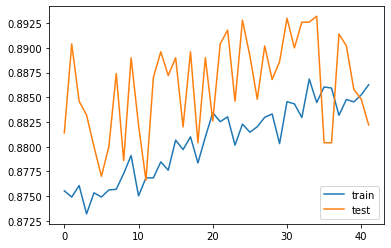

In [132]:
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [133]:
## 코드 리뷰하며 의미 파악해보기!